In [55]:
import tensorflow as tf 
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Load the mnist datasets
mnist = tf.keras.datasets.mnist

In [4]:
# Separate the datasets into 70% training and 30% testing
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 22s 2us/step


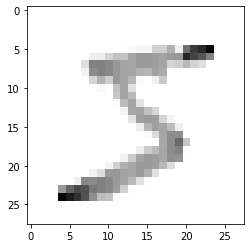

In [44]:
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()

In [11]:
# Visualize the data
# x_train

# To visualize every array
x_train[0]     # [enter array number]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [14]:
#  Scale down the data (Normalize)
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [17]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [21]:
# MAking the cnn model
model =  tf.keras.models.Sequential()  # A feed forward model
# Flatten the layer(first layer)
model.add(tf.keras.layers.Flatten()) # takes our 28x28 and makes it 1x784(Flattens it)
# Dense layer with relu activation
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) # a simply fully connected layer
# Third layer(Dense layer)
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
# Output layer
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax)) # !0 units for 10 classes as this was the output layer

In [22]:
# Compile the modl
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy', # how will we calculating the error to minimize the loss
              metrics = ['accuracy'])


Instructions for updating:
Colocations handled automatically by placer.


In [23]:
# Train the model
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 9s 153us/sample - loss: 0.2604 - acc: 0.9238
Epoch 2/10
60000/60000 [==============================] - 8s 134us/sample - loss: 0.1088 - acc: 0.9662
Epoch 3/10
60000/60000 [==============================] - 8s 135us/sample - loss: 0.0748 - acc: 0.9763
Epoch 4/10
60000/60000 [==============================] - 8s 136us/sample - loss: 0.0555 - acc: 0.9821
Epoch 5/10
60000/60000 [==============================] - 11s 175us/sample - loss: 0.0424 - acc: 0.9860
Epoch 6/10
60000/60000 [==============================] - 11s 187us/sample - loss: 0.0316 - acc: 0.9894
Epoch 7/10
60000/60000 [==============================] - 9s 144us/sample - loss: 0.0265 - acc: 0.9909
Epoch 8/10
60000/60000 [==============================] - 7s 119us/sample - loss: 0.0211 - acc: 0.9927
Epoch 9/10
60000/60000 [==============================] - 7s 116us/sample - loss: 0.0177 - acc: 0.9941
Epoch 10/10
60000/60000 [==============================] - 7s 116us/sam

In [24]:
# Evaluate the model
val_loss, val_acc = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 51us/sample - loss: 0.1087 - acc: 0.9738


In [25]:
val_loss

0.10865412970727194

In [26]:
# Accuracy
val_acc

0.9738

In [27]:
# Save the model
model.save(r'digit_model.model')

In [45]:
# Loading the model
new_model = tf.keras.models.load_model(r'digit_model.model')

In [63]:
# prediction
predictions = new_model.predict(x_test)
# predictions
predictions[5]

array([1.61633502e-11, 9.99969006e-01, 1.10663964e-10, 2.63708153e-11,
       1.40382315e-06, 2.37936892e-09, 2.63196007e-08, 2.18445457e-05,
       7.70040151e-06, 1.87166771e-09], dtype=float32)

In [68]:
# see the prediction in numerical format
np.argmax(predictions[5])

1

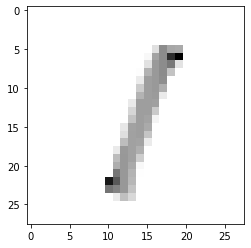

In [66]:
# Visualize the prediction
plt.imshow(x_test[5], cmap=plt.cm.binary)
plt.show()